<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Utilty-fonctions" data-toc-modified-id="Utilty-fonctions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Utilty fonctions</a></span><ul class="toc-item"><li><span><a href="#Basic-parameters" data-toc-modified-id="Basic-parameters-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Basic parameters</a></span></li><li><span><a href="#Dataset-and-data-augmentation" data-toc-modified-id="Dataset-and-data-augmentation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset and data augmentation</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plotting</a></span></li><li><span><a href="#Defining-Simple-model" data-toc-modified-id="Defining-Simple-model-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Defining Simple model</a></span></li><li><span><a href="#Defining-differents-custom-model-for-tensorflow" data-toc-modified-id="Defining-differents-custom-model-for-tensorflow-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Defining differents custom model for tensorflow</a></span></li><li><span><a href="#Callbacks" data-toc-modified-id="Callbacks-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Callbacks</a></span></li></ul></li><li><span><a href="#Simple-Model" data-toc-modified-id="Simple-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Model</a></span></li><li><span><a href="#Transfert-learning" data-toc-modified-id="Transfert-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transfert learning</a></span><ul class="toc-item"><li><span><a href="#Using-Mobile-Net-V2" data-toc-modified-id="Using-Mobile-Net-V2-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Using Mobile Net V2</a></span></li><li><span><a href="#Using-proxyless_nas" data-toc-modified-id="Using-proxyless_nas-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using proxyless_nas</a></span></li></ul></li><li><span><a href="#Benchmark-of-different-pretrained-models" data-toc-modified-id="Benchmark-of-different-pretrained-models-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Benchmark of different pretrained models</a></span><ul class="toc-item"><li><span><a href="#Using--VGG16" data-toc-modified-id="Using--VGG16-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using  VGG16</a></span></li><li><span><a href="#Using-Mix-Net" data-toc-modified-id="Using-Mix-Net-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using Mix Net</a></span></li><li><span><a href="#Create-mix" data-toc-modified-id="Create-mix-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Create mix</a></span></li></ul></li><li><span><a href="#New-Idea-:)--Trying-to-train-three-model-for-each-category" data-toc-modified-id="New-Idea-:)--Trying-to-train-three-model-for-each-category-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>New Idea :)  Trying to train three model for each category</a></span></li><li><span><a href="#Use-of-siamese-network" data-toc-modified-id="Use-of-siamese-network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Use of siamese network</a></span><ul class="toc-item"><li><span><a href="#preparation-variable" data-toc-modified-id="preparation-variable-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>preparation variable</a></span></li><li><span><a href="#Define-paired-dataset." data-toc-modified-id="Define-paired-dataset.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Define paired dataset.</a></span></li></ul></li><li><span><a href="#predictions" data-toc-modified-id="predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>predictions</a></span><ul class="toc-item"><li><span><a href="#Retrain-on-all-data." data-toc-modified-id="Retrain-on-all-data.-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Retrain on all data.</a></span></li></ul></li></ul></div>

In [1]:
## added after several attempt to improve my performance. I noticed that tf.flow_from_directory_doesnt_suport jfif 


# !sudo apt install imagemagick
# !cd data/test; mogrify -format jpg *.jfif
# !cd data/train/healthy_wheat; mogrify -format jpg *.jfif  
# !cd data/train/leaf_rust; mogrify -format jpg *.jfif  
# !cd data/train/stem_rust; mogrify -format jpg *.jfif 

# !pip3 install -q -U tf-hub-nightly
# !pip3 install -q tfds-nightly

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow_hub as hub
from tensorflow.keras import layers
import numpy as np
import PIL.Image as Image


In [4]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [5]:
os.curdir

'.'

## Utilty fonctions

### Basic parameters

In [6]:
# some basic parameters
train_dir = './data/train'

batch_size = 15
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150
IMAGE_SHAPE = (224, 224)


train_healthy_wheat_dir = os.path.join(train_dir, 'healthy_wheat')
train_leaf_rust_dir=   os.path.join(train_dir, 'leaf_rust')
train_stem_rust_dir=   os.path.join(train_dir, 'stem_rust')

In [7]:
num_healthy=len(os.listdir(train_healthy_wheat_dir))
num_leaf_rust=len(os.listdir(train_leaf_rust_dir))
num_stem_rust=len(os.listdir(train_stem_rust_dir))
num_healthy,num_leaf_rust,num_stem_rust,num_healthy+num_leaf_rust+num_stem_rust

(209, 525, 455, 1189)

### Dataset and data augmentation

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255,
#                                     rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5,
                                    validation_split=0.3)

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                          subset='training')
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical',
                                                          subset='validation')


Found 614 images belonging to 3 classes.
Found 261 images belonging to 3 classes.


In [96]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=55,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
#                                     brightness_range=[0.5,1],
                                    zoom_range=0.7,
                                    fill_mode='constant',cval=0,
                                    vertical_flip=True,
                                    validation_split=0.3)

train_data_gen_2 = train_image_generator.flow_from_directory(batch_size=5,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='categorical',
                                                          subset='training')
val_data_gen_2 = train_image_generator.flow_from_directory(batch_size=20,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='categorical',
                                                          subset='validation')

Found 614 images belonging to 3 classes.
Found 261 images belonging to 3 classes.


### Plotting 

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [11]:
def plot_history(): 
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(len(history.epoch))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

### Defining Simple model

In [12]:
def define_simple_model(input_shape_c):
    model = Sequential([
        Conv2D(16, 3, padding='same', activation='relu', input_shape=(input_shape_c[0],input_shape_c[1] ,3)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),

        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D(),
        Flatten(),
        tf.keras.layers.Dropout(0.3),
        Dense(512, activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001)),
        Dense(3,activation='softmax')
    ])
    return model

### Defining differents custom model for tensorflow

In [13]:
def macro_soft_f1(y, y_hat):
    """Compute the macro soft F1-score as a cost.
    Average (1 - soft-F1) across all labels.
    Use probability values instead of binary predictions.
    
    Args:
        y (int32 Tensor): targets array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix of shape (BATCH_SIZE, N_LABELS)
        
    Returns:
        cost (scalar Tensor): value of the cost function for the batch
    """
    
    y = tf.cast(y, tf.float32)
    y_hat = tf.cast(y_hat, tf.float32)
    tp = tf.reduce_sum(y_hat * y, axis=0)
    fp = tf.reduce_sum(y_hat * (1 - y), axis=0)
    fn = tf.reduce_sum((1 - y_hat) * y, axis=0)
    soft_f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    cost = 1 - soft_f1 # reduce 1 - soft-f1 in order to increase soft-f1
    macro_cost = tf.reduce_mean(cost) # average on all labels
    
    return macro_cost

### Callbacks

In [14]:
#callbacks
# learning rate scheduler
def scheduler(epoch):
    l=0.0001
    if epoch < 10:
        return l
    else:
        return l * tf.math.exp(0.1 * (10 - epoch))

lear_rate_change = tf.keras.callbacks.LearningRateScheduler(scheduler)
                                                            
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 2))

epoch_basic_model=100
##stopping callbacks
Early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=7, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)

In [15]:
def macro_f1(y, y_hat, thresh=0.5):
    """Compute the macro F1-score on a batch of observations (average F1 across labels)
    
    Args:
        y (int32 Tensor): labels array of shape (BATCH_SIZE, N_LABELS)
        y_hat (float32 Tensor): probability matrix from forward propagation of shape (BATCH_SIZE, N_LABELS)
        thresh: probability value above which we predict positive
        
    Returns:
        macro_f1 (scalar Tensor): value of macro F1 for the batch
    """
    y_pred = tf.cast(tf.greater(y_hat, thresh), tf.float32)
    tp = tf.cast(tf.math.count_nonzero(y_pred * y, axis=0), tf.float32)
    fp = tf.cast(tf.math.count_nonzero(y_pred * (1 - y), axis=0), tf.float32)
    fn = tf.cast(tf.math.count_nonzero((1 - y_pred) * y, axis=0), tf.float32)
    f1 = 2*tp / (2*tp + fn + fp + 1e-16)
    macro_f1 = tf.reduce_mean(f1)
    return macro_f1

## Simple Model

In this part we will define a basic model. Designed by ourself, it will be put as a reference for the next chapiter where we will introduce pretrained CNN models.

In [26]:
sample_training_images, _ = next(train_data_gen_2)

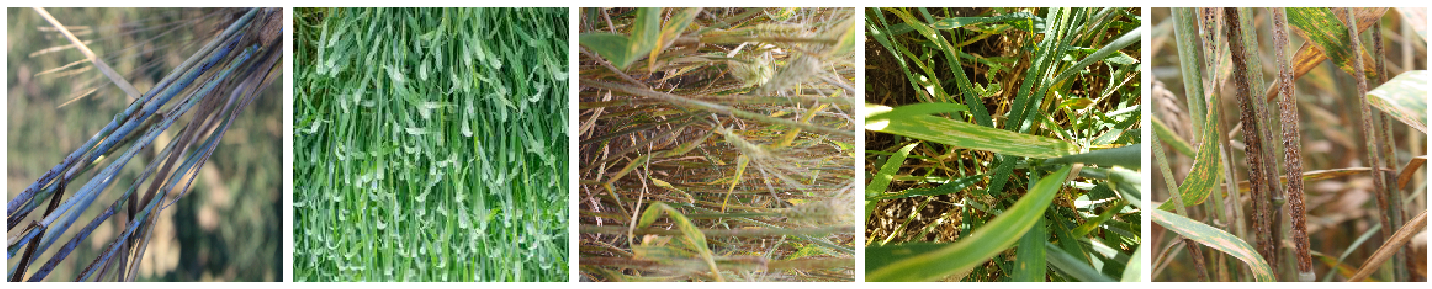

In [27]:
#visualising different image after transformation
plotImages(sample_training_images[:5])

In [36]:
model=define_simple_model(input_shape_c=IMAGE_SHAPE)

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 56, 56, 64)       

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 123 steps, validate for 14 steps
Epoch 1/100
123/123 [==============================] - 245s 2s/step - loss: 1.1893 - accuracy: 0.3974 - categorical_crossentropy: 1.1891 - val_loss: 1.0693 - val_accuracy: 0.4330 - val_categorical_crossentropy: 1.0762
Epoch 2/100
123/123 [==============================] - 209s 2s/step - loss: 1.1798 - accuracy: 0.4300 - categorical_crossentropy: 1.1802 - val_loss: 1.0469 - val_accuracy: 0.4981 - val_categorical_crossentropy: 1.0280
Epoch 3/100
123/123 [==============================] - 167s 1s/step - loss: 1.0640 - accuracy: 0.4414 - categorical_crossentropy: 1.0640 - val_loss: 1.0406 - val_accuracy: 0.4521 - val_categorical_crossentropy: 1.0529
Epoch 4/100
123/123 [==============================] - 172s 1s/step - loss: 1.0691 - accuracy: 0.4707 - categorical_crossentropy: 1.0689 - val_loss: 1.0137 - val_accuracy: 0.4828 - val_categorical_crossentropy: 1.0094
Epoch 5/100
123/123 [==============

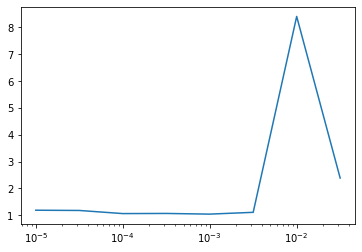

In [20]:
# finding best learning rate
model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy','categorical_crossentropy'])
epoch_basic_model=100
history = model.fit(
    train_data_gen_2,
#     batch_size= batch_size,
    epochs=epoch_basic_model,
    callbacks=[lr_schedule,early_stopping],
    validation_data=val_data_gen_2,
    validation_steps=None
)
plt.semilogx(history.history["lr"], history.history["loss"])
# # plt.axis([1e-7, 1e-4, 0, 30])

In [21]:
#we can use 10-3 like a good learning rate

In [38]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy','categorical_crossentropy'])

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 56, 56, 64)        256       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 56, 56, 64)       

In [40]:
epoch_basic_model=100
history = model.fit(
    train_data_gen_2,
#     batch_size= batch_size,
    epochs=epoch_basic_model,
    callbacks=[lear_rate_change,Early_stop],
    validation_data=val_data_gen_2,
    validation_steps=None
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 123 steps, validate for 14 steps
Epoch 1/100
123/123 [==============================] - 140s 1s/step - loss: 2.1999 - accuracy: 0.4674 - categorical_crossentropy: 1.3819 - val_loss: 1.7596 - val_accuracy: 0.5900 - val_categorical_crossentropy: 1.0247
Epoch 2/100
123/123 [==============================] - 142s 1s/step - loss: 1.6107 - accuracy: 0.6059 - categorical_crossentropy: 0.8923 - val_loss: 1.6918 - val_accuracy: 0.6628 - val_categorical_crossentropy: 0.9912
Epoch 3/100
123/123 [==============================] - 143s 1s/step - loss: 1.4552 - accuracy: 0.6743 - categorical_crossentropy: 0.7673 - val_loss: 1.5544 - val_accuracy: 0.6858 - val_categorical_crossentropy: 0.8845
Epoch 4/100
123/123 [==============================] - 143s 1s/step - loss: 1.3049 - accuracy: 0.7085 - categorical_crossentropy: 0.6441 - val_loss: 1.4388 - val_accuracy: 0.6475 - val_categorical_crossentropy: 0.7942
Epoch 5/100
123/123 [==============

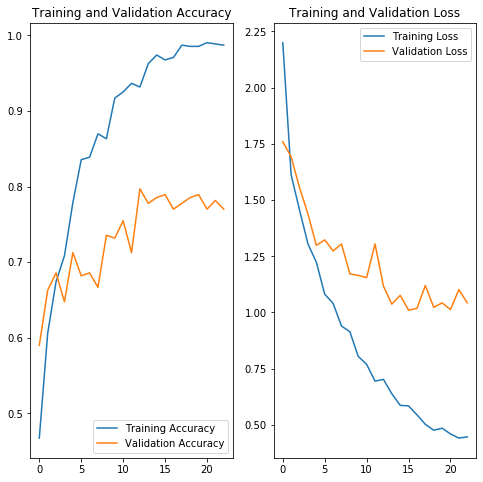

In [41]:
plot_history()

## Transfert learning

In this chapiter we going to use pretrained CNN model combine with a top layer. 

### Using Mobile Net V2

In [16]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [17]:
IMAGE_SHAPE = (224, 224)
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))



In [18]:
batch_size=30

In [97]:
sample_training_images, _ = next(train_data_gen_2)

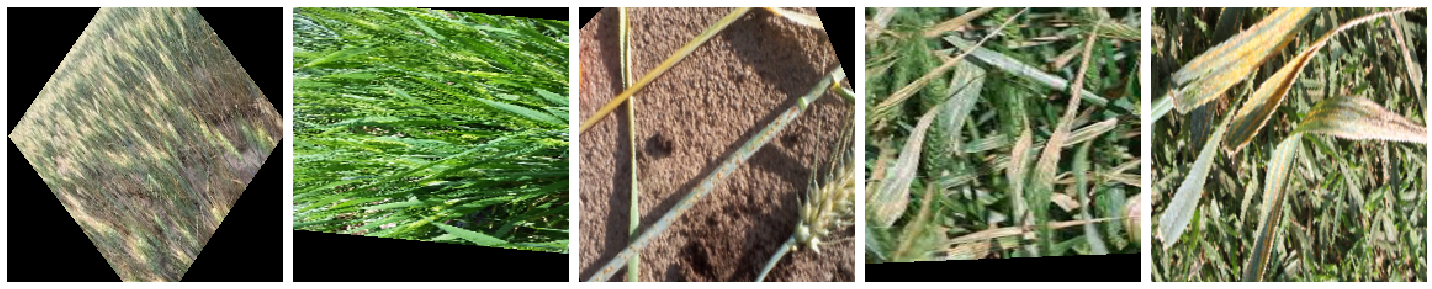

In [98]:
plotImages(sample_training_images[:5])

In [99]:
for image_batch, label_batch in train_data_gen_2:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break


Image batch shape:  (5, 224, 224, 3)
Label batch shape:  (5, 3)


In [100]:
feature_batch = feature_extractor_layer(image_batch)
feature_batch.shape

TensorShape([5, 1280])

In [101]:
feature_extractor_layer.trainable = False

In [102]:
# feature_extractor_layer.output

In [103]:
def v2_model():
    return tf.keras.Sequential([
      feature_extractor_layer,
        tf.keras.layers.Dropout(0.3),
      layers.Dense(500,activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.01)),
      layers.Dense(train_data_gen_2.num_classes,activation='softmax')
    ])

v2=v2_model()

In [104]:
v2.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy','categorical_crossentropy'])

In [105]:
epochs=10
step=10

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 123 steps, validate for 14 steps
Epoch 1/100
123/123 [==============================] - 88s 716ms/step - loss: 1.1651 - accuracy: 0.3958 - categorical_crossentropy: 1.1646 - val_loss: 0.9757 - val_accuracy: 0.4713 - val_categorical_crossentropy: 1.0009
Epoch 2/100
123/123 [==============================] - 86s 701ms/step - loss: 0.8764 - accuracy: 0.5896 - categorical_crossentropy: 0.8761 - val_loss: 0.7626 - val_accuracy: 0.6284 - val_categorical_crossentropy: 0.7905
Epoch 3/100
123/123 [==============================] - 86s 702ms/step - loss: 0.6350 - accuracy: 0.7541 - categorical_crossentropy: 0.6352 - val_loss: 0.5859 - val_accuracy: 0.7816 - val_categorical_crossentropy: 0.6057
Epoch 4/100
123/123 [==============================] - 87s 705ms/step - loss: 0.5264 - accuracy: 0.7687 - categorical_crossentropy: 0.5264 - val_loss: 0.6086 - val_accuracy: 0.7548 - val_categorical_crossentropy: 0.6517
Epoch 5/100
123/123 [==============================] - 87s 708ms/step - loss:

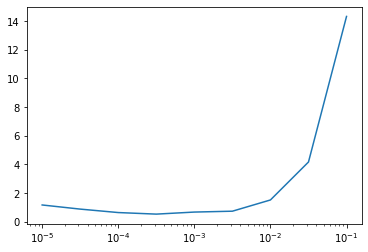

In [51]:
v2.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy','categorical_crossentropy'])
epoch_basic_model=100
history = v2.fit(
    train_data_gen_2,
#     batch_size= batch_size,
    epochs=epoch_basic_model,
    callbacks=[lr_schedule,early_stopping],
    validation_data=val_data_gen_2,
    validation_steps=None
)
plt.semilogx(history.history["lr"], history.history["loss"])

In [ ]:
epoch_basic_model=100
history = v2.fit(
    train_data_gen_2,
#     batch_size= batch_size,
    epochs=epoch_basic_model,
    callbacks=[lear_rate_change,Early_stop],
    validation_data=val_data_gen_2,
    validation_steps=None
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 123 steps, validate for 14 steps
Epoch 1/100
123/123 [==============================] - 105s 857ms/step - loss: 7.7469 - accuracy: 0.5765 - categorical_crossentropy: 0.9189 - val_loss: 7.1997 - val_accuracy: 0.6858 - val_categorical_crossentropy: 0.6944
Epoch 2/100
123/123 [==============================] - 112s 914ms/step - loss: 6.9321 - accuracy: 0.6971 - categorical_crossentropy: 0.6811 - val_loss: 6.5547 - val_accuracy: 0.7931 - val_categorical_crossentropy: 0.6064
Epoch 3/100
123/123 [==============================] - 117s 950ms/step - loss: 6.3112 - accuracy: 0.7704 - categorical_crossentropy: 0.5686 - val_loss: 6.0309 - val_accuracy: 0.7816 - val_categorical_crossentropy: 0.5581
Epoch 4/100
123/123 [==============================] - 114s 931ms/step - loss: 5.7915 - accuracy: 0.7785 - categorical_crossentropy: 0.5038 - val_loss: 5.5409 - val_accuracy: 0.8084 - val_categorical_crossentropy: 0.4982
Epoch 5/100
123/123 [==============================] - 110s 898ms/step - 

Epoch 38/100
123/123 [==============================] - 104s 843ms/step - loss: 1.8725 - accuracy: 0.9430 - categorical_crossentropy: 0.1890 - val_loss: 2.0885 - val_accuracy: 0.8621 - val_categorical_crossentropy: 0.4221
Epoch 39/100
123/123 [==============================] - 101s 822ms/step - loss: 1.8812 - accuracy: 0.9267 - categorical_crossentropy: 0.2050 - val_loss: 2.0814 - val_accuracy: 0.8506 - val_categorical_crossentropy: 0.4205
Epoch 40/100
123/123 [==============================] - 101s 820ms/step - loss: 1.8547 - accuracy: 0.9544 - categorical_crossentropy: 0.1854 - val_loss: 2.1033 - val_accuracy: 0.8467 - val_categorical_crossentropy: 0.4483
Epoch 41/100
 14/123 [==>...........................] - ETA: 58s - loss: 1.9035 - accuracy: 0.9420 - categorical_crossentropy: 0.2373 

In general less we transform our data by dataougmentation, more we are able to achieve a high accuracy.
Even though we can notice that there are still some sort of limit in term of learning capacity because overfitting is hardly avoided. 


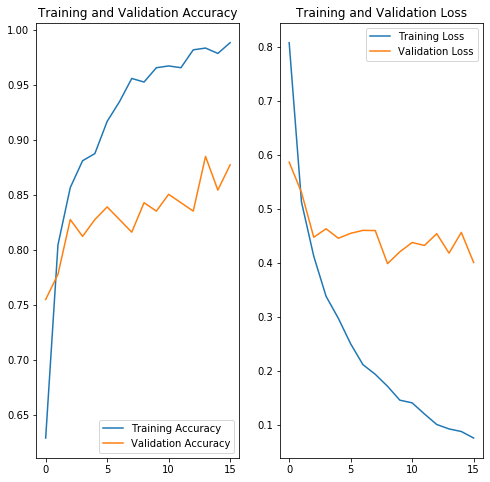

In [30]:
plot_history()

In [139]:
sample_training_images, _ = next(train_data_gen_2)

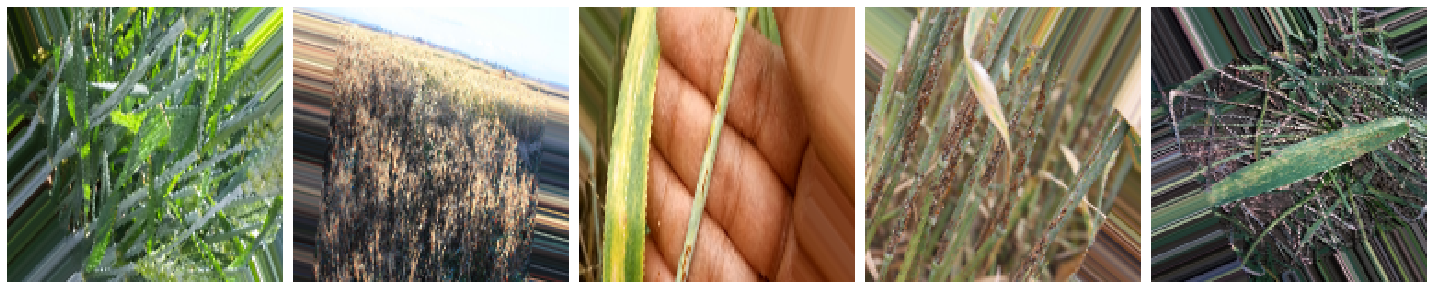

In [130]:
plotImages(sample_training_images[:5])


### Using proxyless_nas

In [ ]:
# using https://github.com/osmr/imgclsmob 
# but already done tutorial on https://www.tensorflow.org/tutorials/images/transfer_learning 

In [162]:
from tf2cv.model_provider import get_model as tf2cv_get_model

# !pip3 install tf2cv


net = tf2cv_get_model("proxylessnas_mobile", pretrained=True, data_format="channels_last")

x = tf.random.normal((1, 224, 224, 3))
y_net = net(x)

y_net.shape

TensorShape([1, 1000])

In [61]:
net.__dict__

{'_self_setattr_tracking': True,
 '_thread_local': <_thread._local at 0x7f1d5861d780>,
 '_name': 'proxyless_nas_4',
 '_activity_regularizer': None,
 '_trainable': True,
 '_dynamic': False,
 '_is_compiled': False,
 '_layers': [<tensorflow.python.keras.engine.sequential.Sequential at 0x7f1d2ba4b7b8>,
 '_compute_output_and_mask_jointly': False,
 'supports_masking': False,
 'optimizer': None,
 '_trainable_weights': [],
 '_non_trainable_weights': [],
 '_updates': [],
 '_losses': [],
 '_callable_losses': [],
 '_metrics': [],
 '_scope': None,
 '_reuse': None,
 '_graph': None,
 '_dtype_policy': <Policy "float32", loss_scale=None>,
 '_dtype_defaulted_to_floatx': True,
 '_outbound_nodes': [],
 '_inbound_nodes': [],
 '_trackable_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f1d2ba62160>,
 '_is_graph_network': False,
 '_expects_training_arg': True,
 '_expects_mask_arg': False,
 '_autocast': True,
 '_supports_ragged_inputs': None,
 'outputs': [],
 'inputs': [],
 '_obj_refer

In [163]:
net_without_top= net.layers[0]
net_without_top.trainable=False

In [13]:
###  TODO : using quality augmentation of resized image

In [176]:
#https://stackoverflow.com/questions/55392591/how-to-remove-the-last-layer-from-trained-model-in-tensorflow

# x=net.layers[0].layers[-1]
# x = Dense(256)(x)
# predictions = Dense(15, activation = "softmax")(x)
# net_without_top=tf.keras.Model(inputs=net.input, outputs=predictions, name='encoder')

model = tf.keras.Sequential([
  net_without_top,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(250),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])



In [177]:
x = tf.random.normal((1, 224, 224, 3))
model(x)


model.summary()

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.12587076, 0.25437725, 0.619752  ]], dtype=float32)>

In [179]:
model.compile(optimizer='adam',
              loss=[tf.compat.v1.losses.log_loss],
              metrics=['accuracy','categorical_crossentropy'])

In [180]:
epochs=15
history=model.fit(
    train_data_gen_2,
    steps_per_epoch=step,
    epochs=epochs,
    validation_data=val_data_gen_2
   
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 10 steps, validate for 18 steps
Epoch 1/15
10/10 [==============================] - 57s 6s/step - loss: 1.2708 - accuracy: 0.4533 - categorical_crossentropy: 2.2269 - val_loss: 0.7776 - val_accuracy: 0.6513 - val_categorical_crossentropy: 1.2971
Epoch 2/15
10/10 [==============================] - 55s 6s/step - loss: 0.8546 - accuracy: 0.6067 - categorical_crossentropy: 1.4113 - val_loss: 0.8607 - val_accuracy: 0.5977 - val_categorical_crossentropy: 1.4635
Epoch 3/15
10/10 [==============================] - 57s 6s/step - loss: 0.7124 - accuracy: 0.6733 - categorical_crossentropy: 1.2547 - val_loss: 0.6728 - val_accuracy: 0.6245 - val_categorical_crossentropy: 1.1188
Epoch 4/15
10/10 [==============================] - 56s 6s/step - loss: 0.7505 - accuracy: 0.5933 - categorical_crossentropy: 1.3338 - val_loss: 0.9416 - val_accuracy: 0.5939 - val_categorical_crossentropy: 1.4495
Epoch 5/15
10/10 [==============================] - 54s 5s/step - loss: 0.8389 - accuracy: 0.6510 - ca

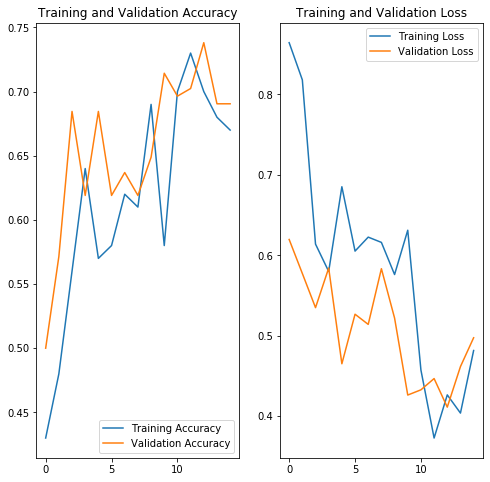

In [113]:
plot_history()

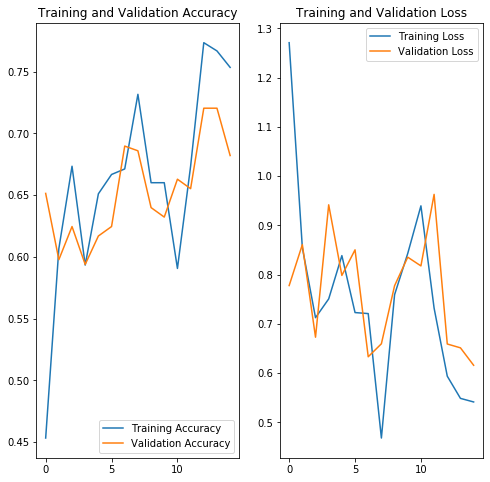

In [181]:
plot_history()

In [137]:
sample_training_images, _ = next(train_data_gen_2)

In [141]:
sample_training_images[:5][0].shape

(224, 224, 3)

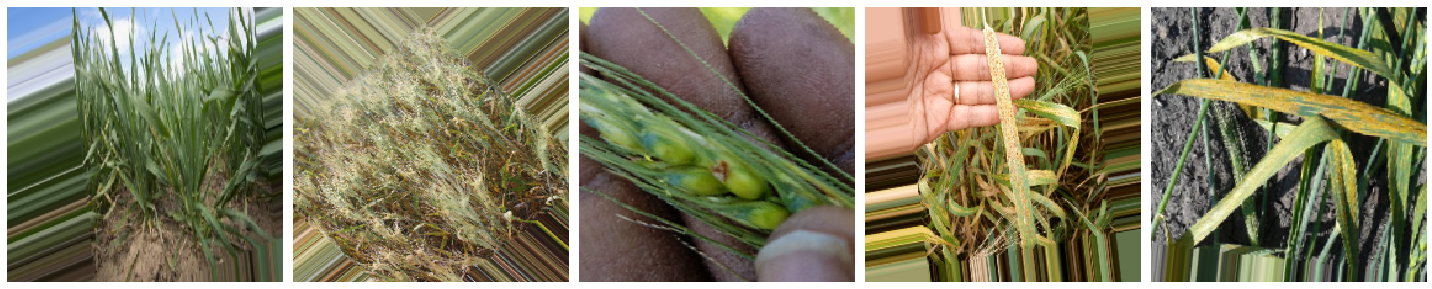

[[0.12129334 0.00092368 0.877783  ]]
[[0.34840438 0.0096194  0.6419762 ]]
[[0.02822479 0.09771931 0.87405586]]
[[0.08165698 0.25368345 0.6646595 ]]
[[0.00742475 0.9416017  0.05097356]]


In [148]:
sample_training_images, _ = next(train_data_gen_2)
plotImages(sample_training_images[:5])
for k in sample_training_images[:5]:
    print(model.predict(k[np.newaxis, ...]))

In [ ]:
train_image_generator.

In [144]:
train_data_gen_2.class_indices

{'healthy_wheat': 0, 'leaf_rust': 1, 'stem_rust': 2}

## Benchmark of different pretrained models

We going to use different models on the data set.
Thes model come from https://github.com/osmr/imgclsmob with hrlp of tf2cv package. 
We will just use the same step as in the previous part to construct and train the model.

###  Using  VGG16 

In [34]:
from tf2cv.model_provider import get_model as tf2cv_get_model


In [69]:
net_VGG16 = tf2cv_get_model("vgg16", pretrained=True, data_format="channels_last")

x = tf.random.normal((1, 224, 224, 3))
y_net =net_VGG16(x)

y_net.shape

TensorShape([1, 1000])

In [70]:
net.layers[1]

NameError: name 'net' is not defined

In [107]:
net_without_top= net_VGG16.layers[0]
net_without_top.trainable=False

In [108]:

model = tf.keras.Sequential([
  net_without_top,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(250),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(3, activation='softmax')
])


In [109]:
x = tf.random.normal((1, 224, 224, 3))
model(x)


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.49110317, 0.20867413, 0.30022278]], dtype=float32)>

In [110]:


model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (Sequential)        multiple                  14714688  
_________________________________________________________________
global_average_pooling2d (Gl multiple                  0         
_________________________________________________________________
dense_12 (Dense)             multiple                  128250    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_13 (Dense)             multiple                  753       
Total params: 14,843,691
Trainable params: 129,003
Non-trainable params: 14,714,688
_________________________________________________________________


In [111]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
              loss=[tf.compat.v1.losses.log_loss],
              metrics=['accuracy','categorical_crossentropy'])

In [ ]:
epochs=100
history=model.fit(
    train_data_gen_2,
    steps_per_epoch=step,
    epochs=epochs,
    callbacks=[lear_rate_change,Early_stop],
    validation_data=val_data_gen_2
   
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 10 steps, validate for 18 steps
Epoch 1/100
10/10 [==============================] - 126s 13s/step - loss: 0.6344 - accuracy: 0.4267 - categorical_crossentropy: 1.0802 - val_loss: 0.5765 - val_accuracy: 0.4713 - val_categorical_crossentropy: 0.9786
Epoch 2/100
10/10 [==============================] - 168s 17s/step - loss: 0.5795 - accuracy: 0.5000 - categorical_crossentropy: 0.9879 - val_loss: 0.5254 - val_accuracy: 0.6245 - val_categorical_crossentropy: 0.8782
Epoch 3/100
10/10 [==============================] - 174s 17s/step - loss: 0.5756 - accuracy: 0.5267 - categorical_crossentropy: 0.9738 - val_loss: 0.5027 - val_accuracy: 0.5747 - val_categorical_crossentropy: 0.8378
Epoch 4/100
10/10 [==============================] - 188s 19s/step - loss: 0.5381 - accuracy: 0.6133 - categorical_crossentropy: 0.8992 - val_loss: 0.4979 - val_accuracy: 0.6284 - val_categorical_crossentropy: 0.8359
Epoch 5/100
10/10 [==============================] - 152s 15s/step - loss: 0.4636 - accura

### Using Mix Net

https://arxiv.org/pdf/1907.09595.pdf //
interesting paper. Network using a mixed size of kernel by channels.

In [35]:
net_mixnet = tf2cv_get_model("mixnet_l", pretrained=True, data_format="channels_last")

x = tf.random.normal((1, 224, 224, 3))


In [36]:
y_net =net_mixnet(x)

y_net.shape

TensorShape([1, 1000])

In [30]:
model = tf.keras.Sequential([
  net_without_top,
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150),
#   tf.keras.layers.Dense(3),
    

  tf.keras.layers.Dense(3, activation='softmax')
])


NameError: name 'net_without_top' is not defined

In [91]:
net_without_top= net_mixnet.layers[0]
net_without_top.trainable=False

In [92]:
x = tf.random.normal((1, 224, 224, 3))
model(x)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
features (Sequential)        multiple                  5846524   
_________________________________________________________________
global_average_pooling2d_7 ( multiple                  0         
_________________________________________________________________
dropout_6 (Dropout)          multiple                  0         
_________________________________________________________________
dense_17 (Dense)             multiple                  230550    
_________________________________________________________________
dense_18 (Dense)             multiple                  453       
Total params: 6,077,527
Trainable params: 231,003
Non-trainable params: 5,846,524
_________________________________________________________________


In [93]:
model.compile(optimizer=tf.keras.optimizers.Nadam(0.001),
              loss=[tf.keras.losses.categorical_crossentropy],
              metrics=['accuracy','categorical_crossentropy'])

In [94]:
epochs=100
history=model.fit(
    train_data_gen_2,
#     steps_per_epoch=step,
    epochs=epochs,
    callbacks=[lear_rate_change,Early_stop],
    validation_data=val_data_gen_2
   
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 41 steps, validate for 18 steps
Epoch 1/100
41/41 [==============================] - 139s 3s/step - loss: 0.8757 - accuracy: 0.5945 - categorical_crossentropy: 0.8755 - val_loss: 0.6713 - val_accuracy: 0.7203 - val_categorical_crossentropy: 0.6683
Epoch 2/100
41/41 [==============================] - 137s 3s/step - loss: 0.6331 - accuracy: 0.7166 - categorical_crossentropy: 0.6332 - val_loss: 0.6566 - val_accuracy: 0.7280 - val_categorical_crossentropy: 0.6410
Epoch 3/100
41/41 [==============================] - 140s 3s/step - loss: 0.6205 - accuracy: 0.7459 - categorical_crossentropy: 0.6206 - val_loss: 0.6418 - val_accuracy: 0.7471 - val_categorical_crossentropy: 0.6399
Epoch 4/100
41/41 [==============================] - 140s 3s/step - loss: 0.4876 - accuracy: 0.7997 - categorical_crossentropy: 0.4876 - val_loss: 0.5264 - val_accuracy: 0.7701 - val_categorical_crossentropy: 0.5194
Epoch 5/100
41/41 [==============================] - 133s 3s/step - loss: 0.4736 - accuracy: 0

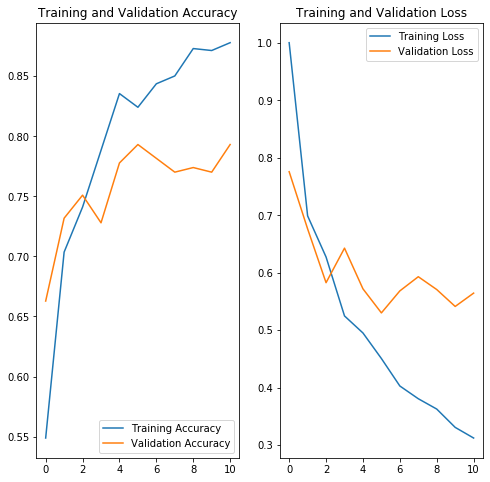

In [84]:
plot_history()

conclusion mix net is a very powerful network and seems to  overfit quickly.


### Create mix

In [ ]:
# in this part 

In [32]:
# compute importation of  the mobil net extractor layers and mixnet network

In [37]:
net_mixnet

In [38]:
feature_extractor_layer

In [39]:
net_mixnet.layers

In [40]:
# For the both we have a row of 1000 elements

In [41]:
(IMAGE_SHAPE[0],IMAGE_SHAPE[1],3)

(224, 224, 3)

In [42]:
net_mixnet.trainable=False
feature_extractor_layer.trainable=False

In [156]:
input_mix=tf.keras.layers.Input(shape=(IMAGE_SHAPE[0],IMAGE_SHAPE[1],3,))
mix_net=net_mixnet(input_mix)
mobv2=feature_extractor_layer(input_mix)
union=tf.keras.layers.Concatenate()([mix_net,mobv2])
dropout=tf.keras.layers.Dropout(0.3)(union)
dens=tf.keras.layers.Dense(250,activation='relu',kernel_regularizer=tf.keras.regularizers.L1L2(l2=0.001))(dropout)
output=tf.keras.layers.Dense(3,activation='sigmoid')(dens)
model_mix=tf.keras.Model(inputs=input_mix, outputs=output, name='mix_mobv2_mixnet')


In [80]:
xx=next(train_data_gen_2)

In [81]:
for image_batch, label_batch in train_data_gen_2:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (5, 224, 224, 3)
Label batch shape:  (5, 3)


In [82]:
# x = tf.random.normal((1, 224, 224, 3))

model_mix(xx[0])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.02963862, 0.8716106 , 0.09875078],
       [0.11723424, 0.54660046, 0.3361653 ],
       [0.09555942, 0.47237056, 0.43207   ],
       [0.28664303, 0.3698061 , 0.34355077],
       [0.3143033 , 0.3242945 , 0.36140218]], dtype=float32)>

In [83]:
model_mix.summary()

Model: "mix_mobv2_mixnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
mix_net (MixNet)                (None, 1000)         7383524     input_1[0][0]                    
__________________________________________________________________________________________________
keras_layer (KerasLayer)        (None, 1280)         2257984     input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 2280)         0           mix_net[0][0]                    
                                                                 keras_layer[1][0] 

In [160]:
model_mix.compile(optimizer=tf.keras.optimizers.Nadam(0.0001),
#               loss=[tf.keras.losses.categorical_crossentropy],
               loss=[macro_soft_f1],
              metrics=['accuracy','categorical_crossentropy',macro_f1])

In [162]:
def scheduler(epoch):
    l=0.00001
    if epoch < 10:
        return l
    else:
        return l * tf.math.exp(0.1 * (10 - epoch))

lear_rate_change = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [163]:
# epoch_mix=10
# history = model_mix.fit(
#     train_data_gen_2,
# #     batch_size= batch_size,
#     epochs=epoch_mix,
#     callbacks=[lr_schedule,early_stopping],
#     validation_data=val_data_gen_2,
# )
# plt.semilogx(history.history["lr"], history.history["loss"])

In [ ]:
epochs=50
history=model_mix.fit(
    train_data_gen_2,
#     steps_per_epoch=step,
    epochs=epochs,
    callbacks=[lear_rate_change,Early_stop],
    validation_data=val_data_gen_2
   
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 123 steps, validate for 14 steps
Epoch 1/50
123/123 [==============================] - 166s 1s/step - loss: 0.9966 - accuracy: 0.4235 - categorical_crossentropy: 1.0414 - macro_f1: 0.4575 - val_loss: 0.9669 - val_accuracy: 0.4215 - val_categorical_crossentropy: 1.0199 - val_macro_f1: 0.4808
Epoch 2/50
123/123 [==============================] - 220s 2s/step - loss: 0.9910 - accuracy: 0.4316 - categorical_crossentropy: 1.0238 - macro_f1: 0.4585 - val_loss: 0.9626 - val_accuracy: 0.4521 - val_categorical_crossentropy: 1.0042 - val_macro_f1: 0.4850
Epoch 3/50
123/123 [==============================] - 179s 1s/step - loss: 0.9774 - accuracy: 0.4414 - categorical_crossentropy: 0.9786 - macro_f1: 0.4791 - val_loss: 0.9473 - val_accuracy: 0.4023 - val_categorical_crossentropy: 0.9463 - val_macro_f1: 0.5228
Epoch 4/50
123/123 [==============================] - 165s 1s/step - loss: 0.9695 - accuracy: 0.4609 - categorical_crossentropy: 0.9458 - macro_f1: 0.4857 - val_loss: 0.9245 - val_

123/123 [==============================] - 168s 1s/step - loss: 0.8760 - accuracy: 0.5065 - categorical_crossentropy: 0.8246 - macro_f1: 0.5360 - val_loss: 0.8254 - val_accuracy: 0.4828 - val_categorical_crossentropy: 0.8287 - val_macro_f1: 0.5946
Epoch 33/50
123/123 [==============================] - 142s 1s/step - loss: 0.8709 - accuracy: 0.5228 - categorical_crossentropy: 0.8100 - macro_f1: 0.5471 - val_loss: 0.8165 - val_accuracy: 0.4904 - val_categorical_crossentropy: 0.8173 - val_macro_f1: 0.6036
Epoch 34/50
123/123 [==============================] - 141s 1s/step - loss: 0.8759 - accuracy: 0.5098 - categorical_crossentropy: 0.8212 - macro_f1: 0.5397 - val_loss: 0.8103 - val_accuracy: 0.4828 - val_categorical_crossentropy: 0.7973 - val_macro_f1: 0.6226
Epoch 35/50
123/123 [==============================] - 144s 1s/step - loss: 0.8779 - accuracy: 0.5163 - categorical_crossentropy: 0.8229 - macro_f1: 0.5393 - val_loss: 0.8209 - val_accuracy: 0.4751 - val_categorical_crossentropy: 0.

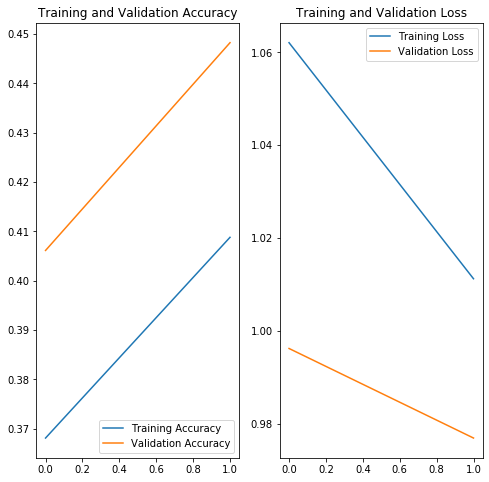

In [165]:
plot_history()

In [74]:
752640/224/224

15.0

In [89]:
20736

20736

## New Idea :)  Trying to train three model for each category

I am going to train three clone of my best feature extractor of each category and just combing the output. 
I will ask to my model to give me the probability for one image to contain specific categories.

In [155]:
def create_simple_model():
    model = Sequential([


        Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
        MaxPooling2D(),

        Conv2D(32, 3, padding='same', activation='relu'),

        MaxPooling2D(),
        Conv2D(64, 3, padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        MaxPooling2D(),
        Flatten(),
    #     tf.keras.layers.Dropout(0.3),
        Dense(512, activation='relu'),
        Dense(3,activation='softmax')
    ])
    return model


In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    brightness_range=[0.5,1],
                                    zoom_range=0.5,
                                    fill_mode='constant',cval=0,
                                    vertical_flip=True,
                                    validation_split=0.3)

In [ ]:
train_data_gen_2 = train_image_generator.flow_from_directory(batch_size=5,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='categorical',
                                                          subset='training')
val_data_gen_2 = train_image_generator.flow_from_directory(batch_size=20,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='categorical',
                                                          subset='validation')

## Use of siamese network

inspired from https://www.kaggle.com/bulentsiyah/plant-disease-using-siamese-network-keras 

### preparation variable

In [14]:
from tensorflow.keras import backend as K

In [15]:
selected_image_size = 224
resize = True
total_sample_size = 10000 # 5k-50k

channel = 1
size = 2

folder_count = 38
image_count = 20 #0-50

if resize == True:
    batch_size=256
else:
    batch_size=64

# path =  os.path.join('../input/plantvillage/plantvillage_resize_224/PlantVillage_resize_224/')
# print(path)

In [16]:
def read_image(filename, byteorder='>'):
    
    #first we read the image, as a raw file to the buffer
    with open(filename, 'rb') as f:
        buffer = f.read()
    
    #using regex, we extract the header, width, height and maxval of the image
    header, width, height, maxval = re.search(
        b"(^P5\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n])*"
        b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    
    #then we convert the image to numpy array using np.frombuffer which interprets buffer as one dimensional array
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))

def compute_accuracy(predictions, labels):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return labels[predictions.ravel() < 0.5].mean()

def accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))

In [68]:
example=train_data_gen_2.next()

In [67]:
example[1]

array([0., 2., 2., 2., 2., 1., 2., 2., 2., 1., 0., 1., 2., 2., 2., 2., 1.,
       2., 0., 1., 1., 2., 0., 1., 1., 2., 2., 1., 2., 2., 2., 1., 0., 1.,
       2., 2., 1., 1., 2., 2., 2., 1., 1., 0., 2., 0., 2., 2., 2., 1., 2.,
       2., 1., 0., 0., 2., 1., 2., 1., 1., 2., 1., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 1., 2., 0., 2., 2., 0., 1., 1., 1.,
       2., 1., 1., 0., 0., 2., 1., 0., 2., 1., 2., 2., 1., 1., 2., 2., 1.,
       1., 0., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2., 1., 0., 2., 1., 1.,
       0., 2., 1., 2., 2., 0., 2., 2., 2., 1., 1., 2., 1., 1., 2., 1., 0.,
       1., 2., 1., 0., 2., 2., 0., 2., 2., 2., 2., 0., 2., 1., 0., 2., 1.,
       2., 2., 2., 1., 1., 1., 1., 1., 2., 2., 2., 2., 1., 2., 1., 2., 1.,
       2., 1., 2., 0., 2., 1., 0., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2.,
       1., 2., 0., 2., 2., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 2.,
       2., 0., 0., 2., 1., 0., 1., 1., 1., 2., 2., 1., 1., 1., 2., 2., 2.,
       0., 0., 1., 2., 0.

In [69]:
example[1]

array([1., 2., 1., 2., 2., 0., 2., 2., 0., 0., 2., 2., 1., 0., 2., 1., 2.,
       1., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 0., 0., 0.,
       0., 1., 1., 2., 2., 1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       1., 2., 2., 2., 1., 2., 2., 2., 2., 0., 1., 1., 1., 1., 2., 2., 2.,
       2., 1., 2., 2., 2., 2., 2., 2., 1., 2., 2., 1., 2., 2., 2., 2., 1.,
       2., 2., 2., 1., 2., 2., 2., 2., 1., 1., 2., 2., 2., 1., 2., 1., 2.,
       2., 1., 0., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 0.,
       1., 1., 2., 1., 2., 2., 2., 1., 0., 0., 2., 0., 0., 2., 0., 2., 2.,
       2., 1.], dtype=float32)

In [72]:
len(example[1]),example[0].shape

(138, (138, 224, 224, 3))

In [73]:
batch_size

256

In [86]:
876-313

563

###  Define paired dataset. 


In [17]:
import glob
list_image=glob.glob("./data/train/**/**.jfif")
count_image=len(list_image)
count_image,list_image

(313,
 ['./data/train/stem_rust/68K0BF.jfif',
  './data/train/stem_rust/U32C73.jfif',
  './data/train/stem_rust/HMBXAG.jfif',
  './data/train/stem_rust/ITHJH3.jfif',
  './data/train/stem_rust/ULWQAO.jfif',
  './data/train/stem_rust/N0XG6F.jfif',
  './data/train/stem_rust/X39Q4J.jfif',
  './data/train/stem_rust/GZ3DJ9.jfif',
  './data/train/stem_rust/N1H2TZ.jfif',
  './data/train/stem_rust/2RCVZ9.jfif',
  './data/train/stem_rust/N1HIQM.jfif',
  './data/train/stem_rust/MLOC1X.jfif',
  './data/train/stem_rust/3TZ5AZ.jfif',
  './data/train/stem_rust/81QY5L.jfif',
  './data/train/stem_rust/H7KBSS.jfif',
  './data/train/stem_rust/D0E3GS.jfif',
  './data/train/stem_rust/O4CB00.jfif',
  './data/train/stem_rust/Q5W30V.jfif',
  './data/train/stem_rust/55E81Z.jfif',
  './data/train/stem_rust/W2JUB6.jfif',
  './data/train/stem_rust/11F0U1.jfif',
  './data/train/stem_rust/DT9HU4.jfif',
  './data/train/stem_rust/59FBYS.jfif',
  './data/train/stem_rust/AFCENX.jfif',
  './data/train/stem_rust/M2YMPN.j

In [24]:
train_data_gen_seam = train_image_generator.flow_from_directory(batch_size=count_image,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='binary',
                                                          subset='training')
val_data_gen_seam = train_image_generator.flow_from_directory(batch_size=count_image,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,
                                                           class_mode='binary',
                                                          subset='validation')

Found 614 images belonging to 3 classes.
Found 261 images belonging to 3 classes.


In [25]:
data_train=train_data_gen_seam.next()# call it once or recall all other part to keep data consistent


In [26]:
data_train[1]

array([2., 1., 1., 2., 2., 0., 2., 1., 1., 1., 2., 0., 2., 1., 1., 1., 2.,
       0., 2., 0., 1., 2., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 1.,
       0., 1., 2., 0., 2., 1., 1., 2., 1., 2., 2., 1., 2., 2., 2., 0., 1.,
       2., 1., 1., 1., 2., 2., 1., 2., 1., 1., 1., 2., 1., 2., 0., 2., 1.,
       2., 0., 0., 2., 2., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 2., 0.,
       2., 0., 2., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 2., 0., 1.,
       1., 0., 1., 1., 0., 2., 1., 1., 1., 1., 1., 0., 2., 0., 1., 1., 1.,
       1., 2., 2., 2., 1., 0., 1., 0., 1., 0., 1., 2., 1., 2., 1., 2., 0.,
       0., 1., 1., 2., 1., 2., 1., 2., 2., 1., 2., 0., 1., 2., 0., 2., 0.,
       2., 0., 2., 1., 1., 1., 0., 1., 1., 2., 1., 1., 2., 0., 2., 2., 0.,
       1., 2., 2., 1., 2., 1., 1., 2., 1., 0., 0., 1., 2., 2., 2., 0., 2.,
       1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 2., 2., 2., 0.,
       1., 2., 1., 2., 1., 2., 1., 1., 2., 0., 2., 0., 1., 1., 1., 1., 2.,
       0., 1., 2., 2., 1.

In [34]:
# data_train[0][:].shape
ziped=zip(data_train[0],data_train[1])
list(ziped)[0]

(array([[[0.5066822 , 0.49194026, 0.3763262 ],
         [0.51058024, 0.49661782, 0.37944454],
         [0.51447815, 0.5012954 , 0.38256294],
         ...,
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ]],
 
        [[0.50511885, 0.4894326 , 0.3883393 ],
         [0.5043393 , 0.488653  , 0.38444135],
         [0.5035597 , 0.4878734 , 0.38054335],
         ...,
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ]],
 
        [[0.4958659 , 0.49353495, 0.39883456],
         [0.49820468, 0.49275532, 0.39727533],
         [0.5005435 , 0.49197575, 0.39571616],
         ...,
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ],
         [0.8980393 , 0.8078432 , 0.6862745 ]],
 
        ...,
 
        [[0.44399536, 0.49974626, 0.4156863 ],
         [0.507118  , 0.5211138 , 0.40875

In [ ]:
[(k[0])   for k in zip(data_train[0],data_train[1]) for  n in zip(data_train[0],data_train[1]) ]

## predictions

### Retrain on all data.

In [92]:
train_image_generator_all = ImageDataGenerator(
#                                         rescale=1./255,
                                    rotation_range=45,
#                                     width_shift_range=.15,
#                                     height_shift_range=.15,
                                    horizontal_flip=True,
#                                     brightness_range=[0.5,1],
                                    zoom_range=0.5,
                                    fill_mode='constant',cval=0,
                                    vertical_flip=True,
                                    validation_split=0.3)
train_data_gen_3 = train_image_generator_all.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMAGE_SHAPE,#(IMG_HEIGHT, IMG_WIDTH),#
                                                           class_mode='categorical')

Found 875 images belonging to 3 classes.


In [70]:
#for proxylessnax_mobile
epochs=10

In [71]:


history = v2.fit(
    train_data_gen_3,
    callbacks=[lear_rate_change],
#     batch_size= batch_size,
    epochs=epochs,
    validation_steps=None
)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 30 steps
Epoch 1/10
30/30 [==============================] - 92s 3s/step - loss: 2.8175 - accuracy: 0.9051 - categorical_crossentropy: 0.2934
Epoch 2/10
30/30 [==============================] - 92s 3s/step - loss: 2.7109 - accuracy: 0.9120 - categorical_crossentropy: 0.2859
Epoch 3/10
30/30 [==============================] - 95s 3s/step - loss: 2.6129 - accuracy: 0.9006 - categorical_crossentropy: 0.2795
Epoch 4/10
30/30 [==============================] - 97s 3s/step - loss: 2.5238 - accuracy: 0.9017 - categorical_crossentropy: 0.2796
Epoch 5/10
30/30 [==============================] - 99s 3s/step - loss: 2.4417 - accuracy: 0.8880 - categorical_crossentropy: 0.2813
Epoch 6/10
30/30 [==============================] - 104s 3s/step - loss: 2.3501 - accuracy: 0.9154 - categorical_crossentropy: 0.2682
Epoch 7/10
30/30 [==============================] - 112s 4s/step - loss: 2.2790 - accuracy: 0.9017 - categorical_crossentropy: 0.2704
Epoch 8/10
30/30 [==============================

In [34]:
import glob
w=!ls ./data/test
w

['008FWT.JPG',
 '00AQXY.JPG',
 '01OJZX.JPG',
 '07OXKK.jfif',
 '07OXKK.jpg',
 '085IEC.jpg',
 '08O2YE.JPG',
 '08WLJO.jfif',
 '08WLJO.jpg',
 '0E1VTP.jfif',
 '0E1VTP.jpg',
 '0GJFRQ.JPG',
 '0J3PQ7.JPG',
 '0JIX2C.jpg',
 '0K9T9T.jpg',
 '0KAN82.JPG',
 '0KUZ3P.jfif',
 '0KUZ3P.jpg',
 '0L5TC8.jpg',
 '0M9DP3.JPG',
 '0OATVC.jpg',
 '0SB9C6.JPG',
 '0Y28MS.jfif',
 '0Y28MS.jpg',
 '109IJP.jpg',
 '13GW8I.JPG',
 '1BBY5N.jfif',
 '1BBY5N.jpg',
 '1DIKQJ.JPG',
 '1DVSQ2.jfif',
 '1DVSQ2.jpg',
 '1HM2XF.JPG',
 '1JPXPR.jfif',
 '1JPXPR.jpg',
 '1NCGYL.jpg',
 '1R1HEY.JPG',
 '1UJG28.JPG',
 '1UUIVR.JPG',
 '1WP5MJ.jpg',
 '1WSHC2.jpg',
 '24NGN1.JPG',
 '25KFBP.jpg',
 '26MSDN.jpg',
 '27CXW6.jfif',
 '27CXW6.jpg',
 '28ZT9U.jpg',
 '29EECO.JPG',
 '29QHAM.jfif',
 '29QHAM.jpg',
 '2A1J3E.jpg',
 '2A95RQ.jfif',
 '2A95RQ.jpg',
 '2B7M5Y.jpg',
 '2DAFN2.JPG',
 '2EJ10A.JPG',
 '2G71YU.jfif',
 '2G71YU.jpg',
 '2JFP1V.JPG',
 '2NB0GZ.jfif',
 '2NB0GZ.jpg',
 '2RD61E.JPG',
 '2TLYBN.JPG',
 '2UP3BD.jpg',
 '2WZMHJ.jfif',
 '2WZMHJ.jpg',
 '2X9AJD.JP

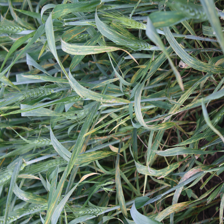

In [94]:
testt=Image.open(f'./data/test/2EJ10A.JPG').resize(IMAGE_SHAPE)#((IMG_HEIGHT, IMG_WIDTH))#
testt

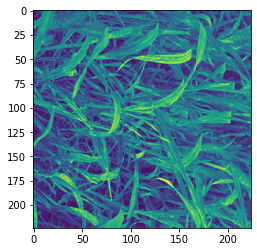

In [95]:
train_image_generator_all.fit(np.array(testt)[np.newaxis, ...])
plt.imshow(next(train_image_generator_all.flow(np.array(testt)[np.newaxis, ...]))[0,:,:,0])

In [87]:
testt = np.array(testt)/255.0

In [187]:
cc=model.predict(testt[np.newaxis, ...])
cc

array([[0.00188876, 0.2815645 , 0.7165468 ]], dtype=float32)

In [35]:
sample=pd.read_csv('./data/sample_submission.csv')

In [82]:
sample

,ID,leaf_rust,stem_rust,healthy_wheat
0,643083,0,0,0
1,008FWT,0,0,0
2,00AQXY,0,0,0
3,01OJZX,0,0,0
4,07OXKK,0,0,0
...,...,...,...,...
605,ZKF0L9,0,0,0
606,ZMAB3R,0,0,0
607,ZOXDKA,0,0,0
608,ZSZMOS,0,0,0


In [83]:
val_data_gen_2.class_indices

{'healthy_wheat': 0, 'leaf_rust': 1, 'stem_rust': 2}

In [72]:
def submit(model):
    for k in sample.ID:
        ind=0
        print(f'treatment for {k}')
        testt=Image.open(glob.glob(f'./data/test/{k}.*')[0]).resize(IMAGE_SHAPE)#((IMG_HEIGHT, IMG_WIDTH))#
        testt=np.array(testt)/225
    #     train_image_generator_all.fit(np.array(testt)[np.newaxis, ...])
        predict=model.predict(testt[np.newaxis, ...]).reshape(-1,)
    #     predict=model.predict(next(train_image_generator_all.flow(np.array(testt)[np.newaxis, ...]))).reshape(-1,)
    #     while len([m for m in predict if m>0.49])==0 and ind<10:
    #         ind+=1
    #         print('retraitment')
    #         predict=model.predict(next(train_image_generator_all.flow(np.array(testt)[np.newaxis, ...]))).reshape(-1,)


        sample.loc[sample.ID==k,'healthy_wheat']=predict[0]
        sample.loc[sample.ID==k,'leaf_rust']=predict[1]
        sample.loc[sample.ID==k,'stem_rust']=predict[2]
submit(v2)

treatment for 643083
treatment for 008FWT
treatment for 00AQXY
treatment for 01OJZX
treatment for 07OXKK
treatment for 085IEC
treatment for 08O2YE
treatment for 08WLJO
treatment for 0E1VTP
treatment for 0GJFRQ
treatment for 0J3PQ7
treatment for 0JIX2C
treatment for 0K9T9T
treatment for 0KAN82
treatment for 0KUZ3P
treatment for 0L5TC8
treatment for 0M9DP3
treatment for 0OATVC
treatment for 0SB9C6
treatment for 0Y28MS
treatment for 109IJP
treatment for 13GW8I
treatment for 1BBY5N
treatment for 1DIKQJ
treatment for 1DVSQ2
treatment for 1HM2XF
treatment for 1JPXPR
treatment for 1NCGYL
treatment for 1R1HEY
treatment for 1UJG28
treatment for 1UUIVR
treatment for 1WP5MJ
treatment for 1WSHC2
treatment for 24NGN1
treatment for 25KFBP
treatment for 26MSDN
treatment for 27CXW6
treatment for 28ZT9U
treatment for 29EECO
treatment for 29QHAM
treatment for 2A1J3E
treatment for 2A95RQ
treatment for 2B7M5Y
treatment for 2DAFN2
treatment for 2EJ10A
treatment for 2G71YU
treatment for 2JFP1V
treatment for

treatment for MD84QB
treatment for MFWPB0
treatment for MG6QMS
treatment for MKUVEU
treatment for MO69MI
treatment for MU5BXX
treatment for MZHRWG
treatment for N0HX6Y
treatment for N567QP
treatment for NBAOVK
treatment for NDDDKK
treatment for NGZ2X2
treatment for NH3AZE
treatment for NK8R1S
treatment for NLB59M
treatment for NN5F6I
treatment for NPQJUS
treatment for NQUCTF
treatment for NS8DVC
treatment for NURNH0
treatment for NXCA0Q
treatment for NYJHQI
treatment for O2A1R8
treatment for O2N892
treatment for O7V8IB
treatment for O8QEI5
treatment for OBZOCF
treatment for OCEBS4
treatment for OCUL7A
treatment for ODZH9T
treatment for OE2KYL
treatment for OHDGS7
treatment for OK5TQU
treatment for OLG8KI
treatment for OLIZFO
treatment for ON9PIT
treatment for OOALVQ
treatment for OPYUWH
treatment for OR3QHI
treatment for OS8FB2
treatment for OSMWTE
treatment for OVOLCQ
treatment for OWX65S
treatment for P2SLLF
treatment for P3NJLX
treatment for PDMILG
treatment for PDTDLS
treatment for

In [43]:
sample

,ID,leaf_rust,stem_rust,healthy_wheat
0,643083,0.0,0.0,1.0
1,008FWT,1.0,0.0,0.0
2,00AQXY,1.0,0.0,0.0
3,01OJZX,1.0,0.0,0.0
4,07OXKK,0.0,0.0,1.0
...,...,...,...,...
605,ZKF0L9,0.0,0.0,1.0
606,ZMAB3R,0.0,1.0,0.0
607,ZOXDKA,0.0,1.0,0.0
608,ZSZMOS,0.0,1.0,0.0


In [60]:
sample[[ 'leaf_rust','stem_rust','healthy_wheat']]=sample[[ 'leaf_rust','stem_rust','healthy_wheat']].apply(lambda x:(max(x)==x)*1,axis=1).values


In [61]:
sample

,ID,leaf_rust,stem_rust,healthy_wheat
0,643083,0,0,1
1,008FWT,1,0,0
2,00AQXY,1,0,0
3,01OJZX,1,0,0
4,07OXKK,0,0,1
...,...,...,...,...
605,ZKF0L9,0,0,1
606,ZMAB3R,0,1,0
607,ZOXDKA,0,1,0
608,ZSZMOS,0,1,0


In [73]:
sample.sum()

ID               643083008FWT00AQXY01OJZX07OXKK085IEC08O2YE08WL...
leaf_rust                                                  279.081
stem_rust                                                  215.886
healthy_wheat                                              115.033
dtype: object

In [64]:
sample.shape,2+182+93

((610, 4), 610)

In [74]:
sample.to_csv('./data/submit.csv',index=False)

In [81]:
sample.loc[sample[[ 'leaf_rust','stem_rust','healthy_wheat']].apply(lambda x:max(x),axis=1)<0.5]

,ID,leaf_rust,stem_rust,healthy_wheat
18,0SB9C6,0.041305,0.490838,0.467857
34,25KFBP,0.459403,0.430961,0.109636
44,2EJ10A,0.408060,0.421386,0.170554
79,476JFR,0.292804,0.238190,0.469006
84,4CCP3Y,0.320342,0.371915,0.307743
98,566UF3,0.499750,0.496919,0.003331
116,64NM6J,0.490985,0.134477,0.374539
160,8NRRD6,0.190652,0.450578,0.358769
178,A3XMJG,0.128850,0.456719,0.414431
180,A71S2G,0.349828,0.407425,0.242747


In [80]:
sample[[ 'leaf_rust','stem_rust','healthy_wheat']].apply(max,axis=1)

0      0.696645
1      0.754059
2      0.697255
3      0.754059
4      0.939046
         ...   
605    0.896166
606    0.700064
607    0.983264
608    0.962404
609    0.695634
Length: 610, dtype: float64